### 1. 회귀 기반 모델링 – 회귀 (예측)

auto mpg 데이터셋으로 연비예측.

1. LinearRegression
2. PolynominalRegression
3. Ridge
4. Lasso
각 모델들의 성능을 비교


### 2. 회귀 기반 모델링 – 분류 타겟 변경 필요
LogisticRegression



### *columns 이름
mpg: 연비 (종속 변수)

cylinders: 실린더 수

displacement: 배기량

horsepower: 출력

weight: 차량 무게

acceleration: 가속도

model year: 출시 년도

origin: 제조국 (1: 미국, 2: 유럽, 3: 일본)

car name: 차량 이름

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
auto_df=pd.read_csv('./data/auto-mpg.csv')

In [26]:
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [27]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [28]:
auto_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [29]:
auto_df["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [30]:
#"horsepower" 열에서 "?" 값을 NaN 값으로 대체
auto_df["horsepower"] = auto_df["horsepower"].replace('?', np.nan)

#NaN 값을 제외한 "horsepower" 열의 데이터 평균값을 계산
avg_horsepower = auto_df["horsepower"].astype("float").mean(skipna=True)

#NaN 값을 평균값으로 대체
auto_df["horsepower"] = auto_df["horsepower"].astype("float").fillna(avg_horsepower)

#"horsepower" 열의 데이터를 int64로 변환
auto_df["horsepower"] = auto_df["horsepower"].astype("int64")

In [31]:
auto_df["horsepower"].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 104, 100, 105, 175,
       153, 180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208,
       155, 112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91,
       122,  67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,
        53,  81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,
        66, 139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,
        74, 116,  82], dtype=int64)

In [35]:
# 상관계수 확인
mobile=(abs(auto_df.corr().mpg))
mobile

C:\Users\y2kjd\AppData\Local\Temp\ipykernel_20192\1066327421.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mobile=(abs(auto_df.corr().mpg))


mpg             1.000000
cylinders       0.775396
displacement    0.804203
horsepower      0.771543
weight          0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

In [38]:
# 결과 정렬
mobile.sort_values(ascending=False)

mpg             1.000000
weight          0.831741
displacement    0.804203
cylinders       0.775396
horsepower      0.771543
model year      0.579267
origin          0.563450
acceleration    0.420289
Name: mpg, dtype: float64

(array([31., 90., 59., 54., 37., 40., 29., 34., 18.,  6.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <BarContainer object of 10 artists>)

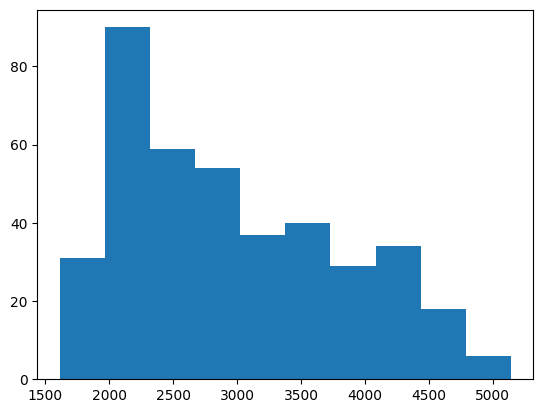

In [40]:
# 정규분포 확인-------------------------------------------------------
plt.hist(auto_df.weight)

(array([107.,  89.,  31.,  13.,  57.,   3.,  42.,  31.,  16.,   9.]),
 array([ 68. , 106.7, 145.4, 184.1, 222.8, 261.5, 300.2, 338.9, 377.6,
        416.3, 455. ]),
 <BarContainer object of 10 artists>)

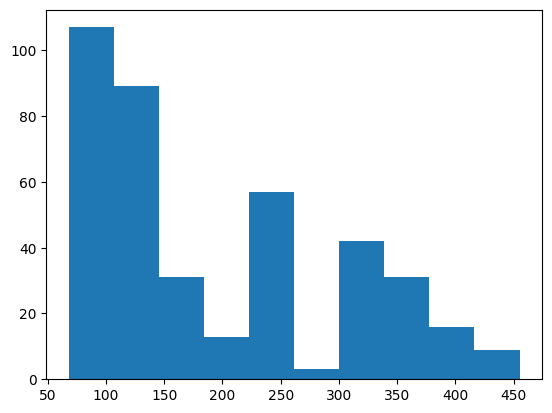

In [41]:
# 정규분포 확인-------------------------------------------------------
plt.hist(auto_df.displacement)

(array([  4.,   0., 204.,   0.,   3.,   0.,  84.,   0.,   0., 103.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

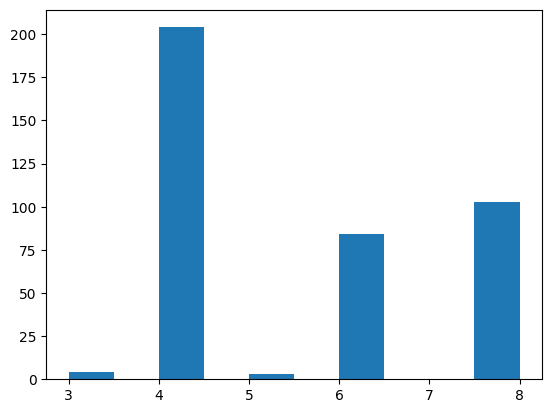

In [42]:
# 정규분포 확인-------------------------------------------------------
plt.hist(auto_df.cylinders)

(array([ 27.,  95., 120.,  50.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <BarContainer object of 10 artists>)

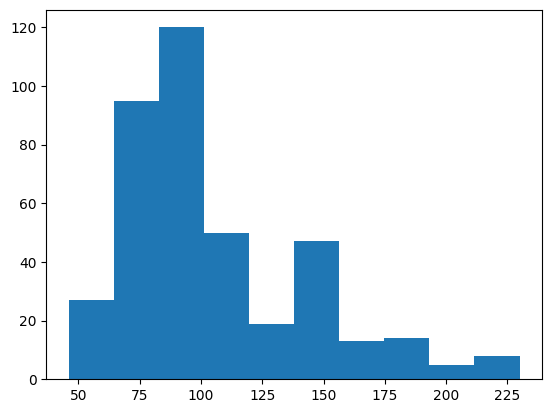

In [43]:
# 정규분포 확인-------------------------------------------------------
plt.hist(auto_df.horsepower)

In [45]:
# [2-2]모순값 또는 노이즈 데이터 체크 : 다른 데이터와 다른 이상한 값 여부
for col in auto_df.columns:
    print(auto_df[col].unique())

[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
[8 4 6 3 5]
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262.  134.  119.  171.  115.  10

In [44]:
# 모순값 또는 노이즈 데이터 체크 : 다른 데이터와 다른 이상한 값 여부
for col in auto_df.columns:
    print(f"--[{col}----------]")
    print(auto_df[col].value_counts())

--[mpg----------]
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: mpg, Length: 129, dtype: int64
--[cylinders----------]
4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64
--[displacement----------]
97.0     21
98.0     18
350.0    18
318.0    17
250.0    17
         ..
104.0     1
110.0     1
130.0     1
111.0     1
144.0     1
Name: displacement, Length: 82, dtype: int64
--[horsepower----------]
150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: horsepower, Length: 94, dtype: int64
--[weight----------]
1985    4
2130    4
2125    3
2945    3
2265    3
       ..
2875    1
3102    1
3664    1
2807    1
2625    1
Name: weight, Length: 351, dtype: int64
--[acceleration----------]
14.5    23
15.5    21
14.0    16
16.0    16
13.5    15
        ..
11.1     1
12.1     1
21.9     1
22.1     1
11.6     1
Name: acceleration, Leng

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
# 다중선형회귀=============================================================
model1=LinearRegression()

In [61]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X=auto_df[auto_df.columns[:-1]]
y=auto_df.mpg
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [59]:
X.shape, y.shape

((398, 8), (398,))

In [53]:
model1.fit(X,y)

LinearRegression()

In [54]:
# 회귀계수 확인
model1.coef_, model1.intercept_

(array([-90.11698839]), 5089.487113013488)

In [56]:
# 예측 => predict(20)
y_pre=model1.predict(X)
y_pre

array([3467.38132193, 3737.73228711, 3467.38132193, 3647.61529871,
       3557.49831032, 3737.73228711, 3827.8492755 , 3827.8492755 ,
       3827.8492755 , 3737.73228711, 3737.73228711, 3827.8492755 ,
       3737.73228711, 3827.8492755 , 2926.67939156, 3106.91336835,
       3467.38132193, 3197.03035674, 2656.32842638, 2746.44541478,
       2836.56240317, 2926.67939156, 2836.56240317, 2746.44541478,
       3197.03035674, 4188.31722908, 4188.31722908, 4098.20024068,
       4278.43421747, 2656.32842638, 2566.21143799, 2836.56240317,
       2836.56240317, 3377.26433353, 3647.61529871, 3557.49831032,
       3377.26433353, 3467.38132193, 3827.8492755 , 3827.8492755 ,
       3827.8492755 , 3827.8492755 , 4008.08325229, 3917.96626389,
       3917.96626389, 3467.38132193, 3106.91336835, 3377.26433353,
       3467.38132193, 3016.79637996, 2566.21143799, 2385.9774612 ,
       2385.9774612 , 2295.86047281, 1935.39251923, 2656.32842638,
       2746.44541478, 2926.67939156, 2836.56240317, 3016.79637

In [57]:
# R2스퀘어 값
model1.score(X,y)

0.6917929800341573